## Running the Monte Carlo (Put in your data)

In [3]:

import numpy as np
current_followers = 55000 # Change this
last_10_days_growth = [1057, 1224, 1071, 1186, 1330, 958, 663, 612, 475, 726]  # Change this

mu = np.mean(last_10_days_growth)
sigma = np.std(last_10_days_growth, ddof=1)

mu, sigma

(np.float64(930.2), np.float64(292.46454675928004))

In [4]:
def simulate_normal_mc(
    mu: float,
    sigma: float,
    current_followers: int,
    target_followers: int = 100_000,
    max_days: int = 5000,
    rng=np.random.default_rng()
) -> int:
    """
    Monte Carlo path using a normal distribution for daily growth: N(mu, sigma).
    Returns the number of days to hit the target.
    """

    followers = current_followers
    days = 0

    while followers < target_followers and days < max_days:
        daily_growth = rng.normal(mu, sigma)

        # Ensure no negative daily growth unless you want to model loss
        daily_growth = max(daily_growth, 0)

        followers += daily_growth
        days += 1

    return days


In [5]:
def run_simulations_normal(
    mu,
    sigma,
    current_followers,
    target_followers=100_000,
    n_simulations=20_000,
    max_days=5000,
    seed=42
):
    rng = np.random.default_rng(seed)

    results = np.array([
        simulate_normal_mc(
            mu=mu,
            sigma=sigma,
            current_followers=current_followers,
            target_followers=target_followers,
            max_days=max_days,
            rng=rng
        )
        for _ in range(n_simulations)
    ])

    return results


In [6]:
results = run_simulations_normal(mu, sigma, current_followers)

stats = {
    "expected_days": np.mean(results),
    "median_days": np.median(results),
    "p10_days": np.percentile(results, 10),
    "p90_days": np.percentile(results, 90),
}

stats


{'expected_days': np.float64(48.9205),
 'median_days': np.float64(49.0),
 'p10_days': np.float64(46.0),
 'p90_days': np.float64(52.0)}

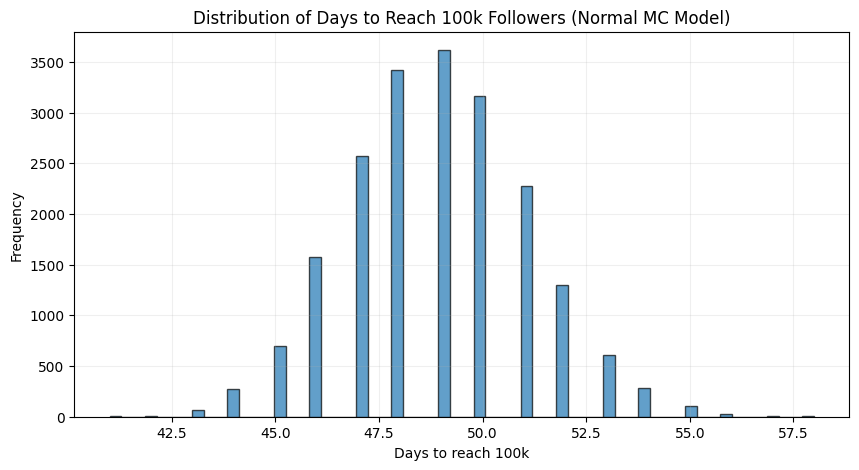

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

plt.hist(results, bins=60, edgecolor='black', alpha=0.7)

plt.title("Distribution of Days to Reach 100k Followers (Normal MC Model)")
plt.xlabel("Days to reach 100k")
plt.ylabel("Frequency")

plt.grid(alpha=0.2)
plt.show()
